In [9]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
water_stress= pd.read_excel("./../Data/Water_stress.xlsx")
water_stress.head()

,Clave,Nombre,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,I,Península de Baja California,86.33,75.94,75.91,75.88,73.28,76.80,77.24,77.92,68.70,79.64,79.84,81.20,81.32,89.92,91.86
1,II,Noroeste,80.45,87.08,92.31,91.42,90.63,88.18,87.31,83.95,75.88,81.16,81.35,81.56,84.69,84.96,82.81
2,III,Pacífico Norte,41.24,40.04,40.49,40.74,40.62,40.04,40.07,40.33,39.43,41.93,42.08,40.59,40.42,40.46,40.05
3,IV,Balsas,36.96,49.68,49.77,49.37,49.38,47.10,46.34,46.52,46.73,48.67,49.81,50.11,50.18,51.55,52.04
4,V,Pacífico Sur,3.93,3.94,4.10,4.12,4.15,4.37,4.44,4.66,4.67,5.04,5.09,5.09,5.12,5.15,5.49


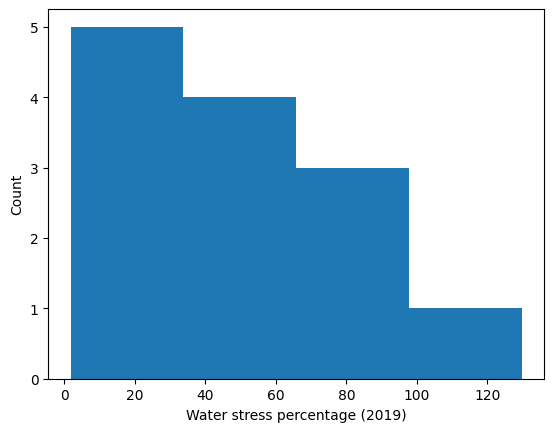

In [18]:
plt.hist(water_stress[2019], bins=4)
plt.xlabel("Water stress percentage (2019)")
plt.ylabel("Count")
plt.show()

In [12]:
water_stress_filtered=water_stress[water_stress[2019]>40.0]
water_stress_filtered

,Clave,Nombre,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,I,Península de Baja California,86.33,75.94,75.91,75.88,73.28,76.80,77.24,77.92,68.70,79.64,79.84,81.20,81.32,89.92,91.86
1,II,Noroeste,80.45,87.08,92.31,91.42,90.63,88.18,87.31,83.95,75.88,81.16,81.35,81.56,84.69,84.96,82.81
2,III,Pacífico Norte,41.24,40.04,40.49,40.74,40.62,40.04,40.07,40.33,39.43,41.93,42.08,40.59,40.42,40.46,40.05
3,IV,Balsas,36.96,49.68,49.77,49.37,49.38,47.10,46.34,46.52,46.73,48.67,49.81,50.11,50.18,51.55,52.04
5,VI,Río Bravo,72.43,76.33,76.44,77.36,76.00,71.56,73.10,73.66,71.69,77.24,77.10,76.73,75.36,76.11,75.36
6,VII,Cuencas Centrales del Norte,55.20,45.36,49.29,48.61,48.70,45.33,46.07,46.30,46.63,48.42,48.39,48.38,47.65,47.85,47.53
7,VIII,Lerma Santiago Pacífico,36.03,40.19,40.76,41.46,41.93,42.36,41.04,42.08,41.99,43.57,44.82,45.42,45.18,45.63,45.84
12,XIII,Aguas del Valle de México,119.11,154.28,155.10,132.31,132.58,133.89,136.04,136.08,137.79,137.99,138.69,139.15,141.38,129.24,129.73


In [13]:
water_stress_melted = water_stress_filtered.melt(id_vars=["Clave", "Nombre"], var_name="Year", value_name="Water stress")
water_stress_melted

,Clave,Nombre,Year,Water stress
0,I,Península de Baja California,2005,86.33
1,II,Noroeste,2005,80.45
2,III,Pacífico Norte,2005,41.24
3,IV,Balsas,2005,36.96
4,VI,Río Bravo,2005,72.43
...,...,...,...,...
115,IV,Balsas,2019,52.04
116,VI,Río Bravo,2019,75.36
117,VII,Cuencas Centrales del Norte,2019,47.53
118,VIII,Lerma Santiago Pacífico,2019,45.84


In [14]:
def add_trendline(x, y, ax):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle="--", linewidth=2, color='gray')

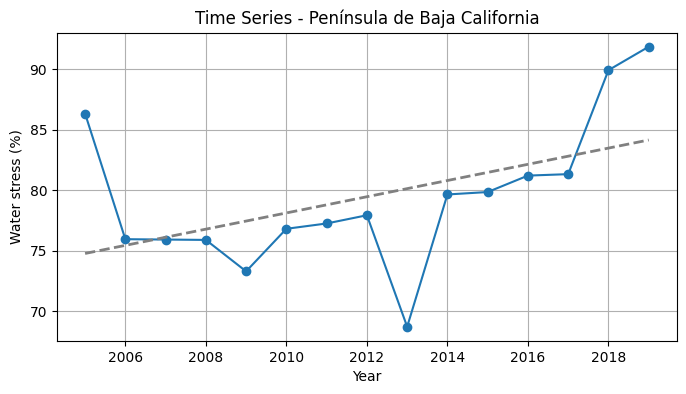

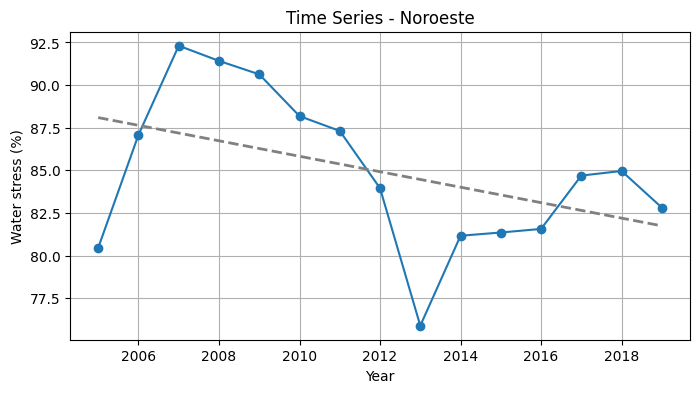

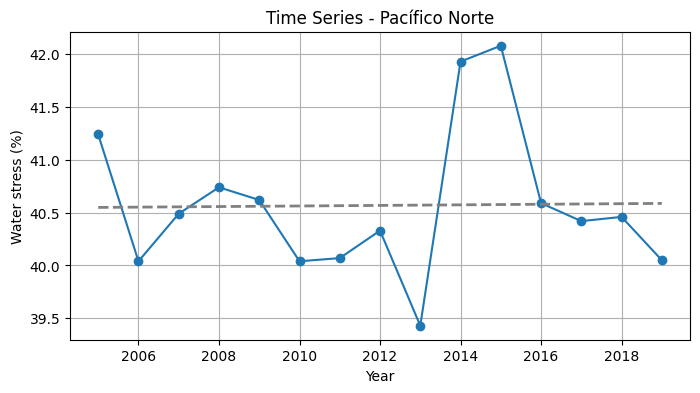

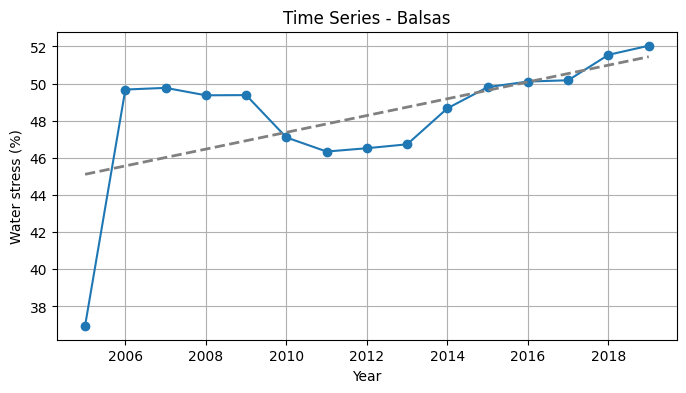

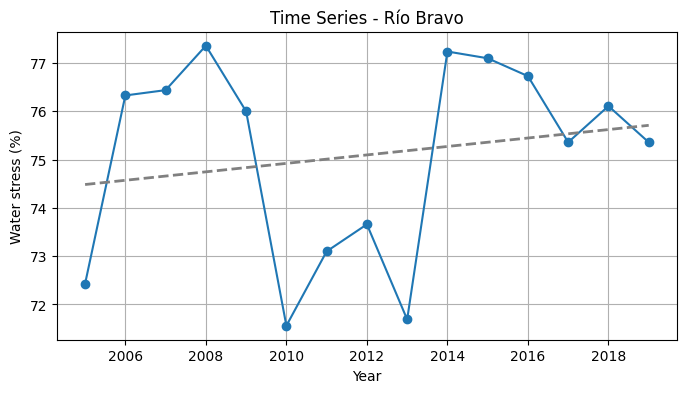

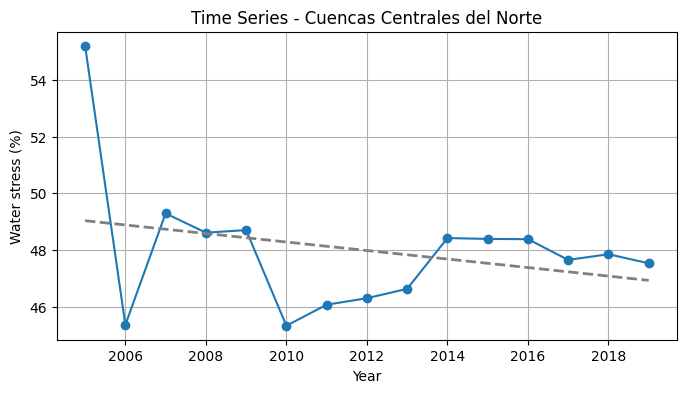

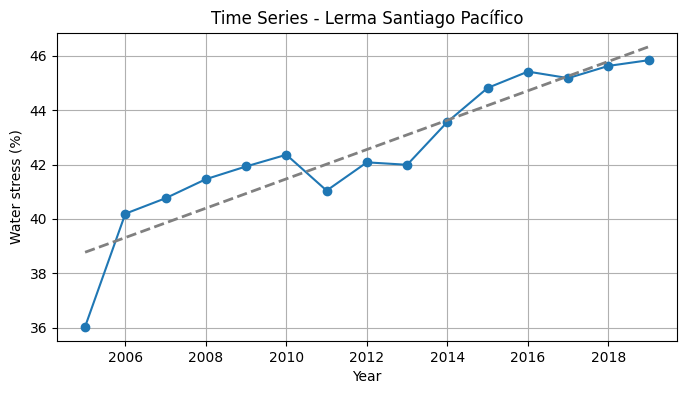

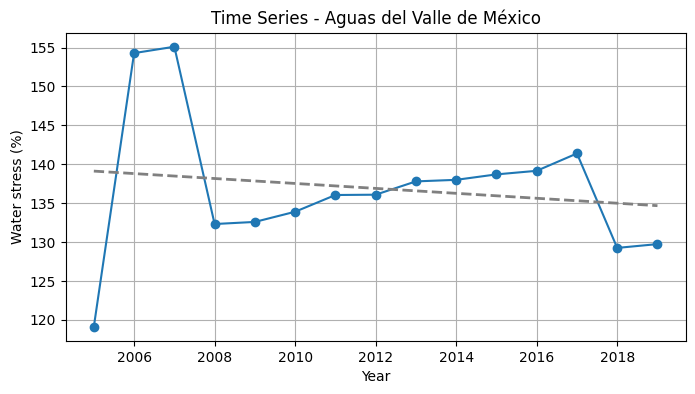

In [16]:
for name in water_stress_filtered['Nombre'].unique():
    df_region = water_stress_melted[water_stress_melted['Nombre'] == name].copy()

    df_region['Year'] = pd.to_numeric(df_region['Year'])

    plt.figure(figsize=(8, 4))
    plt.plot(df_region['Year'], df_region['Water stress'], marker='o', label=name)

    add_trendline(df_region['Year'], df_region['Water stress'], plt.gca())

    plt.title(f'Time Series - {name}')
    plt.xlabel('Year')
    plt.ylabel('Water stress (%)')
    plt.grid(True)
    plt.show()

In [ ]:
data_path = "./../Data"
file_names = os.listdir(data_path)